In [1]:
import multiprocessing
import numpy as np
import xarray as xr
import os
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy.optimize import curve_fit
from pymer4.models import Lmer
import math
import re

In [2]:
#a，c原始数据

In [2]:
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_forest_AVP.csv') #_non
m,n = Q10_data.shape

Q10_plot_all1 = []   #不划分AVP，用于曲线的拟合
T_plot_all1 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
        Q10_plot_all1.append(Q10_data['Q10'][j])
        T_plot_all1.append(Q10_data['T'][j])


Q10_plot1 = []      #划分AVP，根据AVP进行划分
T_plot1 = []
AVP_plot1 =[]
for AVPi in np.arange(3,30,1):
    Q10_ploti = []
    T_ploti = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
    if len(T_ploti)>=2:
        Q10_plot1.append(Q10_ploti)
        T_plot1.append(T_ploti)
        AVP_plot1.append(AVPi)

##################################################################################################################################################################
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_forest_VPD_days10.csv') #_non
m,n = Q10_data.shape

Q10_plot_all2 = []
T_plot_all2 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
        Q10_plot_all2.append(Q10_data['Q10'][j])
        T_plot_all2.append(Q10_data['T'][j])
        
Q10_plot2 = []
T_plot2 = []
AVP_plot2 =[]

for AVPi in np.arange(3,30,1):
    Q10_ploti = []
    T_ploti = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
    if len(T_ploti)>=2:
        Q10_plot2.append(Q10_ploti)
        T_plot2.append(T_ploti)
        AVP_plot2.append(AVPi)


##################################################################################################################################################     
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_non_forest_AVP.csv') #_non
m,n = Q10_data.shape

Q10_plot_all3 = []  #不划分AVP，用于曲线的拟合
T_plot_all3 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
        Q10_plot_all3.append(Q10_data['Q10'][j])
        T_plot_all3.append(Q10_data['T'][j])


Q10_plot3 = []    #划分AVP，根据AVP进行划分
T_plot3 = []
AVP_plot3 =[]
for AVPi in np.arange(3,30,1):
    Q10_ploti = []
    T_ploti = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
    if len(T_ploti)>=2:
        Q10_plot3.append(Q10_ploti)
        T_plot3.append(T_ploti)
        AVP_plot3.append(AVPi)

#####################################################################################################################################################
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_non_forest_VPD_days10.csv') #_non
m,n = Q10_data.shape

Q10_plot_all4 = []
T_plot_all4 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 302:
        Q10_plot_all4.append(Q10_data['Q10'][j])
        T_plot_all4.append(Q10_data['T'][j])
        
Q10_plot4 = []
T_plot4 = []
AVP_plot4 =[]

for AVPi in np.arange(3,30,1):
    Q10_ploti = []
    T_ploti = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
    if len(T_ploti)>=1:
        Q10_plot4.append(Q10_ploti)
        T_plot4.append(T_ploti)
        AVP_plot4.append(AVPi)

In [3]:
#b,d,标准差数据

In [3]:
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_forest_AVP.csv')
m,n = Q10_data.shape

Q10_std_plot1 = []
T_std_plot1 = []

for Ti in np.arange(0,35,1):
    Q10_i = []

    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
            Q10_i.append(Q10_data['Q10'][j])

    if len(Q10_i)>=3:
        Q10_std_plot1.append(np.std(Q10_i))
        T_std_plot1.append(Ti)

##############################################################################################################
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_non_forest_AVP.csv')
m,n = Q10_data.shape

Q10_std_plot2 = []
T_std_plot2 = []

for Ti in np.arange(0,35,1):
    Q10_i = []
    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
            Q10_i.append(Q10_data['Q10'][j])

    if len(Q10_i)>=3:
        Q10_std_plot2.append(np.std(Q10_i))
        T_std_plot2.append(Ti)

In [5]:
#AVP,q10,表明AVP和Q10没有显著相关性

In [4]:
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_forest_AVP.csv') #non_
m,n = Q10_data.shape

Q10_AVP_plot1 = []
T_AVP_plot1 = []
AVP_AVP_plot1 =[]

for Ti in np.arange(0,35,1):
    Q10_ploti = []
    AVP_ploti = []
    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] ==0 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
            Q10_ploti.append(Q10_data['Q10'][j])
            AVP_ploti.append(Q10_data['AVP'][j])
    if len(Q10_ploti)>=3:
        Q10_AVP_plot1.append(Q10_ploti)
        AVP_AVP_plot1.append(AVP_ploti)
        T_AVP_plot1.append(Ti)

##########################################################################################################################################
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_non_forest_AVP.csv') #non_
m,n = Q10_data.shape

Q10_AVP_plot2 = []
T_AVP_plot2 = []
AVP_AVP_plot2 =[]

for Ti in np.arange(0,35,1):
    Q10_ploti = []
    AVP_ploti = []
    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] ==0 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
            Q10_ploti.append(Q10_data['Q10'][j])
            AVP_ploti.append(Q10_data['AVP'][j])
    if len(Q10_ploti)>=3:
        Q10_AVP_plot2.append(Q10_ploti)
        AVP_AVP_plot2.append(AVP_ploti)
        T_AVP_plot2.append(Ti)

In [5]:
#Q10与AVP之间的斜率

slope1 = []
pvalue1 = []
pvalue_symbol1 = []
T_slope1 = []
slope_std1 = []
for i in range(len(AVP_AVP_plot1)):
    AVP_AVP_plot1i = sm.add_constant(AVP_AVP_plot1[i])
    model = sm.OLS(Q10_AVP_plot1[i], AVP_AVP_plot1i)
    results = model.fit()
    slope1.append(results.params[1])
    pvalue1.append(results.pvalues[1])
    T_slope1.append(T_AVP_plot1[i])
    slope_std1.append(results.bse[1])
    #print(results.params[1], results.pvalues[1])
    
    
slope2 = []
pvalue2 = []
pvalue_symbol2 = []
T_slope2 = []
slope_std2 = []
for i in range(len(AVP_AVP_plot2)):
    AVP_AVP_plot2i = sm.add_constant(AVP_AVP_plot2[i])
    model = sm.OLS(Q10_AVP_plot2[i], AVP_AVP_plot2i)
    results = model.fit()
    slope2.append(results.params[1])
    pvalue2.append(results.pvalues[1])
    T_slope2.append(T_AVP_plot2[i])
    slope_std2.append(results.bse[1])
    #print(results.params[1], results.pvalues[1])

In [25]:
np.mean(slope1)

0.0030799611326125863

In [27]:
np.mean(slope2)

-0.0005669383147709461

In [6]:
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_forest_T_tol5.csv') #_non
m,n = Q10_data.shape
Q10_plot_T_all1 = []
T_plot_T_all1 = []
Q10_std1 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5  and Q10_data['T'][j] <= 32:
        Q10_plot_T_all1.append(Q10_data['Q10'][j])
        T_plot_T_all1.append(Q10_data['T'][j])
        Q10_std1.append(Q10_data['SE'][j])


Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_non_forest_T_tol5.csv') #_non    /Old_result/A_Result_2/
m,n = Q10_data.shape
Q10_plot_T_all2 = []
T_plot_T_all2 = []
Q10_std2 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 80 and Q10_data['T'][j] >= 5 and Q10_data['T'][j] <= 32:
        Q10_plot_T_all2.append(Q10_data['Q10'][j])
        T_plot_T_all2.append(Q10_data['T'][j])
        Q10_std2.append(Q10_data['SE'][j])


In [ ]:
#模型的矫正

In [7]:
path1 = 'C:/Users/111/Desktop/LMX_data_Q10/Old_data/Forest_AVP_T_tol_5_VPD_tol_1/'
T_AVP = []
T_label_AVP = []
for Ti in np.arange(0,31,1):
    T_AVPi = []
    for csv_file in os.listdir(path1):
        numbers = re.findall(r'\d+', csv_file)
        numbers = [int(num) for num in numbers]
        if numbers[1] == Ti:
            data1 = pd.read_csv(path1+csv_file)
            m1, n1 = data1.shape
            for i in range(m1):
                T_AVPi.append(data1['normalized_T'][i]*10+10)
    if len(T_AVPi) > 1000:
        T_AVP.append(T_AVPi)
        T_label_AVP.append(Ti)

path2 = 'C:/Users/111/Desktop/LMX_data_Q10/Old_data/Forest_VPD_T_tol_5_VPD_tol_2_days10/'
T_VPD = []
T_label_VPD = []
for Ti in np.arange(0,31,1):
    T_VPDi = []
    for csv_file in os.listdir(path2):
        numbers = re.findall(r'\d+', csv_file)
        numbers = [int(num) for num in numbers]
        if numbers[1] == Ti:
            data2 = pd.read_csv(path2+csv_file)
            m2, n2 = data2.shape
            for i in range(m2):
                T_VPDi.append(data2['normalized_T'][i]*10+10)
    if len(T_VPDi) > 1000:
        T_VPD.append(T_VPDi)
        T_label_VPD.append(Ti)
        
T_label_AVP_plot = []
for i in range(len(T_label_AVP)-1):
    T_label_AVP_plot.append(T_label_AVP[i+1])

T_label_VPD_plot = []
for i in range(len(T_label_VPD)-1):
    T_label_VPD_plot.append(T_label_VPD[i+1]+0.4)

T_mean_AVP = []
for i in range(len(T_AVP[1:])):
    T_mean_AVP.append(np.mean(T_AVP[i+1]))

T_mean_VPD = []
for i in range(len(T_VPD[1:])):
    T_mean_VPD.append(np.mean(T_VPD[i+1]))

KeyboardInterrupt: 

In [ ]:
path1 = 'C:/Users/111/Desktop/LMX_data_Q10/Old_data/Non_forest_AVP_T_tol_5_VPD_tol_1/'
T_AVP1 = []
T_label_AVP1 = []
for Ti in np.arange(0,31,1):
    T_AVPi = []
    for csv_file in os.listdir(path1):
        numbers = re.findall(r'\d+', csv_file)
        numbers = [int(num) for num in numbers]
        if numbers[1] == Ti:
            data1 = pd.read_csv(path1+csv_file)
            m1, n1 = data1.shape
            for i in range(m1):
                T_AVPi.append(data1['normalized_T'][i]*10+10)
    if len(T_AVPi) > 1000:
        T_AVP1.append(T_AVPi)
        T_label_AVP1.append(Ti)

path2 = 'C:/Users/111/Desktop/LMX_data_Q10/Old_data/Non_forest_VPD_T_tol_5_VPD_tol_2_days10/'
T_VPD1 = []
T_label_VPD1 = []
for Ti in np.arange(0,31,1):
    T_VPDi = []
    for csv_file in os.listdir(path2):
        numbers = re.findall(r'\d+', csv_file)
        numbers = [int(num) for num in numbers]
        if numbers[1] == Ti:
            data2 = pd.read_csv(path2+csv_file)
            m2, n2 = data2.shape
            for i in range(m2):
                T_VPDi.append(data2['normalized_T'][i]*10+10)
    if len(T_VPDi) > 1000:
        T_VPD1.append(T_VPDi)
        T_label_VPD1.append(Ti)
        
T_label_AVP_plot1 = []
for i in range(len(T_label_AVP1)-1):
    T_label_AVP_plot1.append(T_label_AVP1[i+1])

T_label_VPD_plot1 = []
for i in range(len(T_label_VPD1)-1):
    T_label_VPD_plot1.append(T_label_VPD1[i+1]+0.4)

T_mean_AVP1 = []
for i in range(len(T_AVP1[1:])):
    T_mean_AVP1.append(np.mean(T_AVP1[i+1]))

T_mean_VPD1 = []
for i in range(len(T_VPD1[1:])):
    T_mean_VPD1.append(np.mean(T_VPD1[i+1]))

[ 6.47179685e-04 -4.08868579e-02  1.94104848e+00]
[ 7.67415908e-04 -4.62024076e-02  2.01139139e+00]
[-0.01936099  1.86074228]
[ 5.63626411e-04 -3.75182836e-02  1.96209135e+00]
[ 6.39285356e-04 -4.65734928e-02  2.10649800e+00]
[-0.01909815  1.93350037]


Text(-0.28, 1.05, 'f')

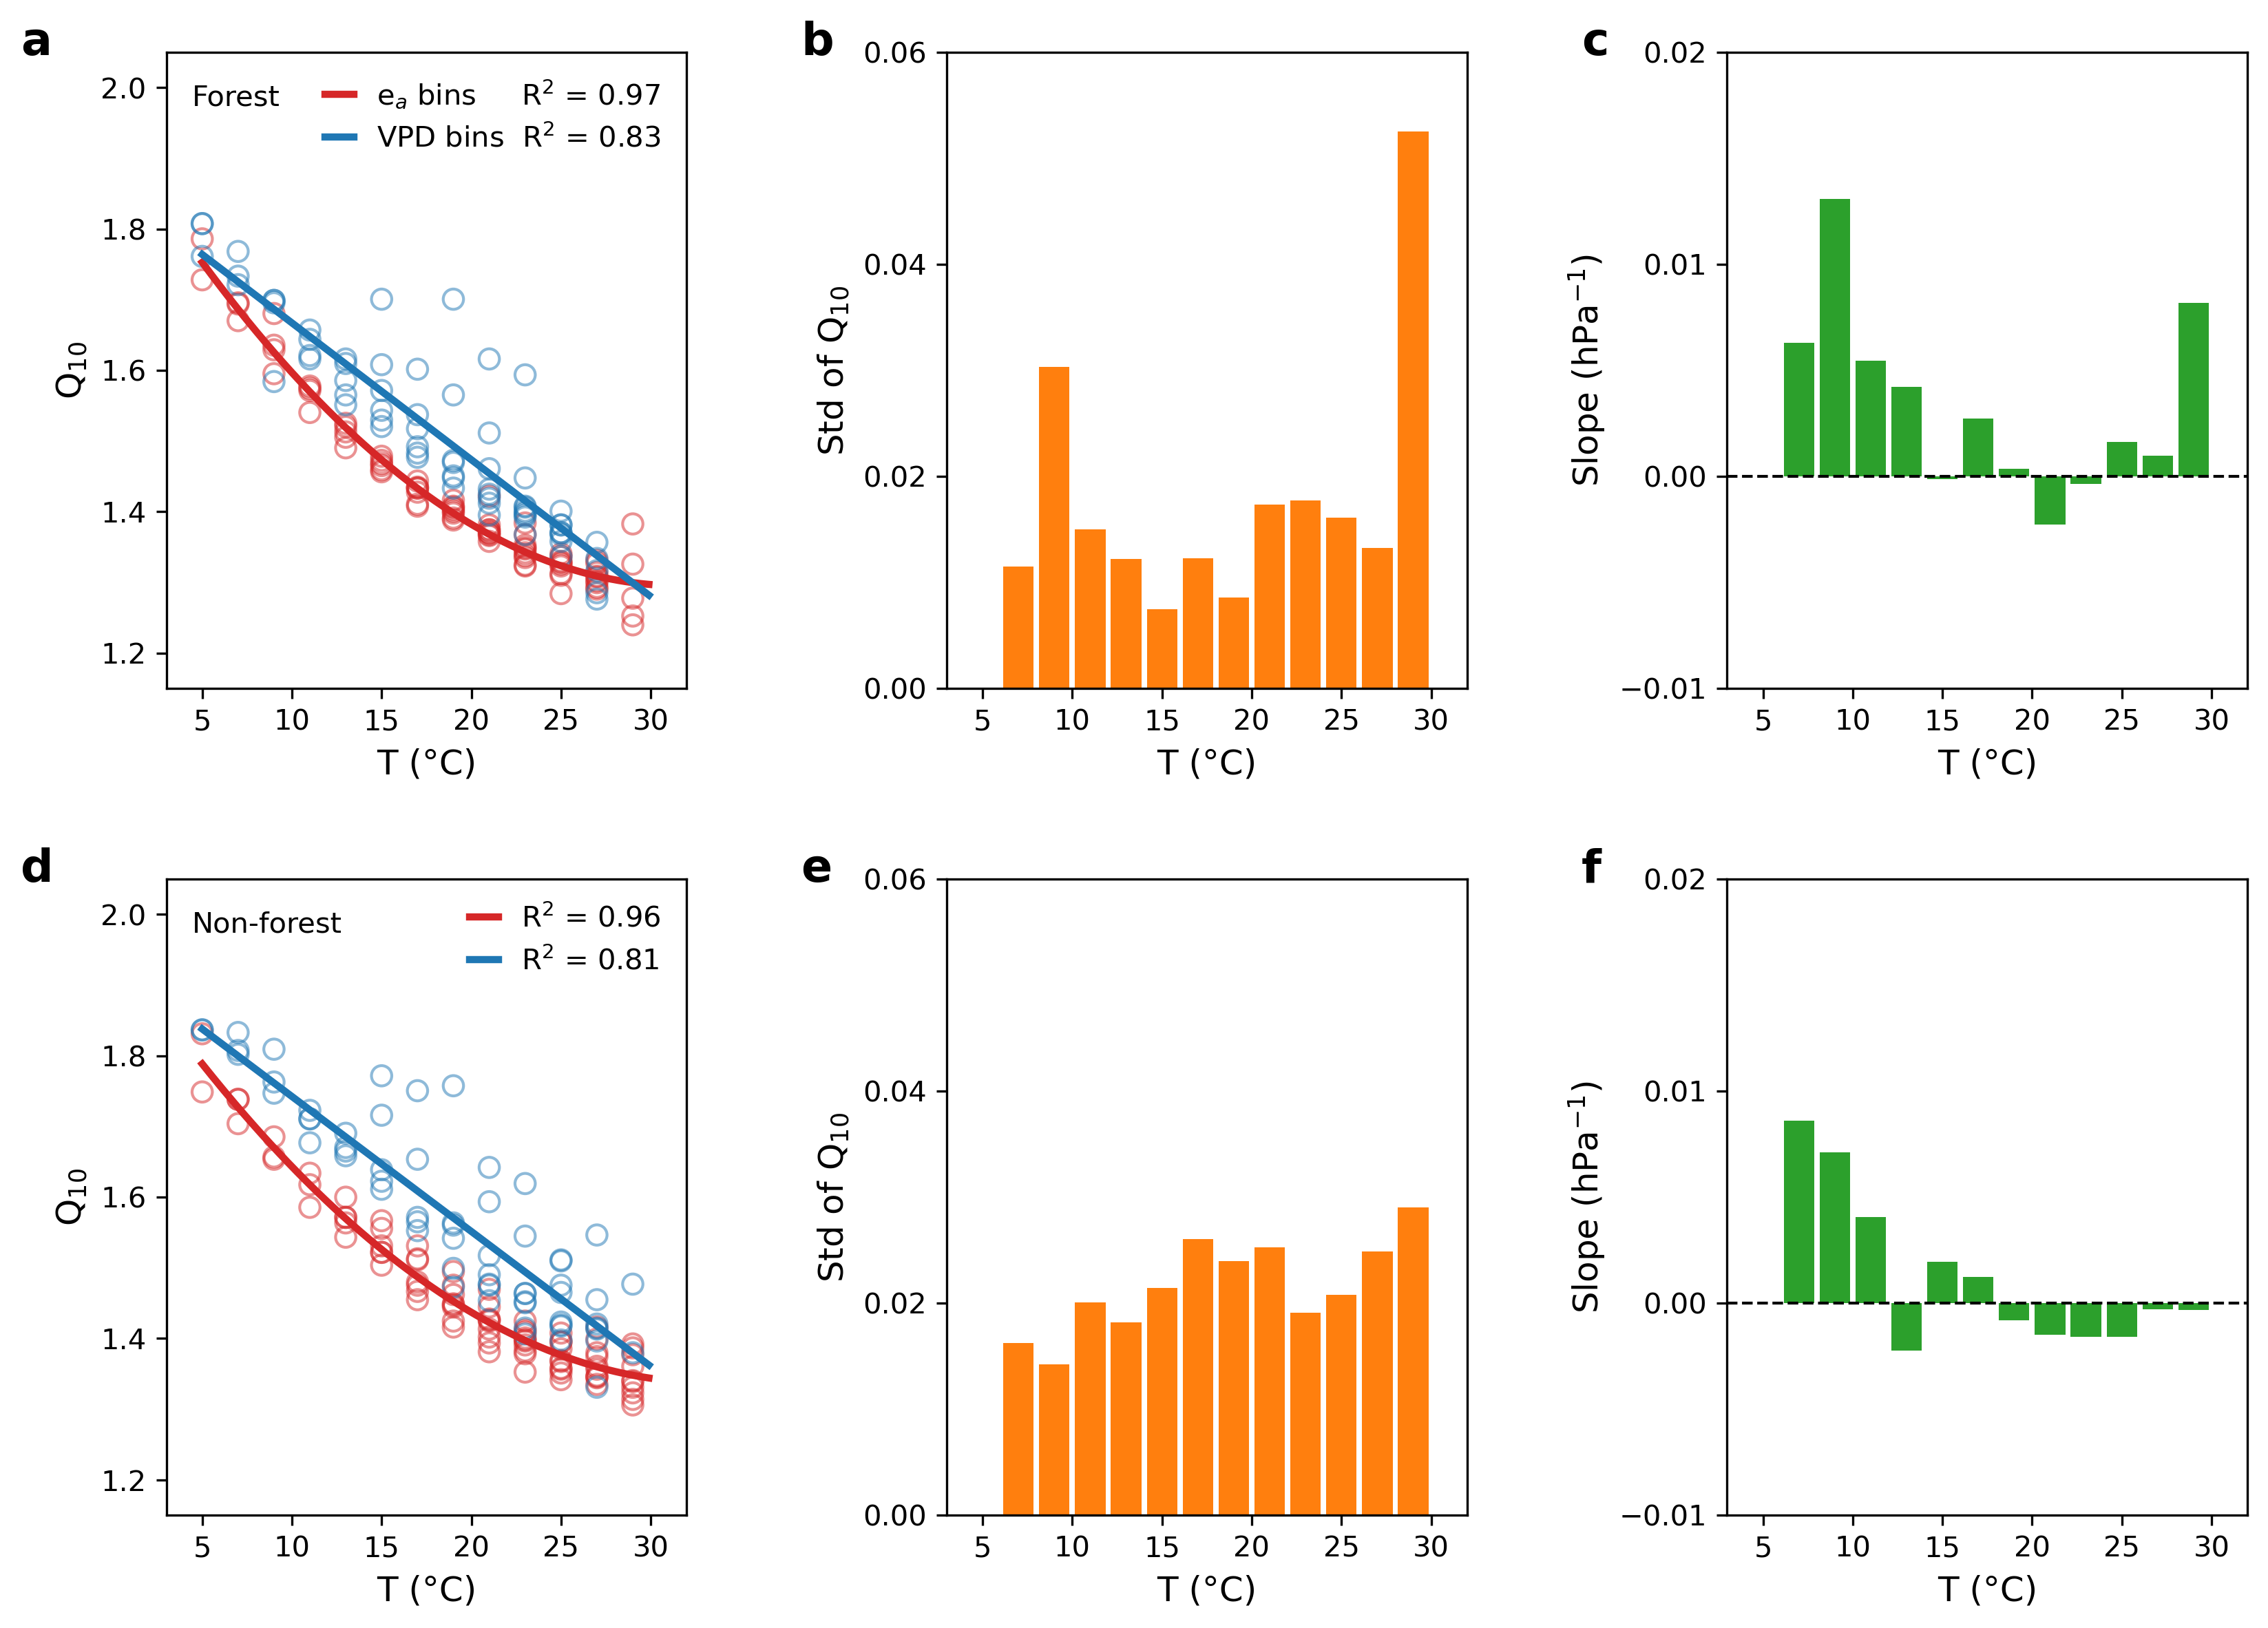

In [8]:
fig = plt.figure(figsize=(13, 9.2),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)
plt.rcParams['axes.linewidth'] = 0.8
colors = ["#0000FF", "#4169E1", "#6495ED", "#00FF00", "#7CFC00", "#ADFF2F", "#FF0000", "#FF4500", "#FF6347", "yellow", "tab:orange", "tab:blue", "tab:gray"]


################################################################################################################################################
ax1 = fig.add_subplot(2,3,1)
#same_AVP
x = T_plot_all1
y = Q10_plot_all1
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
print(coefficients)

for i in range(len(Q10_plot1)):
    ax1.scatter(T_plot1[i], Q10_plot1[i], marker='o', edgecolor='tab:red', facecolor='none', s=50, alpha=0.5)
x_plot1 = np.arange(5,30,0.1)
ax1.plot(x_plot1, p(x_plot1), color='tab:red', linewidth=2.5, label='e$_{a}$ bins     R$^{2}$ = '+str(round(r_squared,2)))


#绘制不划分AVP，和VPD的曲线
x = T_plot_T_all1
y = Q10_plot_T_all1
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
x_plot12 = np.arange(5,30,0.1)
#ax1.plot(x_plot12, p(x_plot12), color='black', linewidth=2.5, ls="--")
print(coefficients)

#same_VPD
x = T_plot_all2
y = Q10_plot_all2
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
# 计算决定系数（R-squared）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
print(coefficients)

for i in range(len(Q10_plot2)):
    ax1.scatter(T_plot2[i], Q10_plot2[i], marker='o', edgecolor='tab:blue', facecolor='none', s=50, alpha=0.5)
x_plot2 = np.arange(5,30,0.1)


ax1.plot(x_plot2, p(x_plot2), color='tab:blue', linewidth=2.5, label='VPD bins  R$^{2}$ = '+str(round(r_squared,2)))

ax1.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
ax1.set_ylim(1.15, 2.05)
ax1.set_xlim(3, 32)
ax1.set_xticks(np.linspace(5,30,6))
ax1.set_yticks(np.linspace(1.2, 2.0, 5))
ax1.set_xlabel('T (°C)',size = 12)
ax1.set_ylabel('Q$_{10}$',size = 12)
ax1.text(-0.28, 1.05, "a", transform=ax1.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax1.text(0.05, 0.95, "Forest", transform=ax1.transAxes,
         fontsize=10, fontweight='normal', va='top', ha='left')


#######################################################################################################################################################
ax2 = fig.add_subplot(2,3,4)
#same_AVP
x = T_plot_all3
y = Q10_plot_all3
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
print(coefficients)

for i in range(len(Q10_plot3)):
    ax2.scatter(T_plot3[i], Q10_plot3[i], marker='o', edgecolor='tab:red', facecolor='none', s=50, alpha=0.5)
x_plot3 = np.arange(5,30,0.1)

formatted_r_squared = "{:.2f}".format(r_squared)

ax2.plot(x_plot3, p(x_plot3), color='tab:red', linewidth=2.5, label='R$^{2}$ = '+str(formatted_r_squared))

#绘制不划分AVP，和VPD的曲线
x = T_plot_T_all2
y = Q10_plot_T_all2
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
x_plot22 = np.arange(5,30,0.1)
#ax2.plot(x_plot22, p(x_plot22), color='black', linewidth=2.5, ls="--",zorder=4)
print(coefficients)

#same_VPD
x = T_plot_all4
y = Q10_plot_all4
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
print(coefficients)


# 计算决定系数（R-squared）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

# 绘制原始数据和拟合曲线
for i in range(len(Q10_plot4)):
    ax2.scatter(T_plot4[i], Q10_plot4[i], marker='o', edgecolor='tab:blue', facecolor='none', s=50, alpha=0.5)
x_plot4 = np.arange(5,30,0.1)

formatted_r_squared = "{:.2f}".format(r_squared)

ax2.plot(x_plot4, p(x_plot4), color='tab:blue', linewidth=2.5, label='R$^{2}$ = '+str(formatted_r_squared))

ax2.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
ax2.set_ylim(1.15, 2.05)
ax2.set_xlim(3, 32)
ax2.set_xticks(np.linspace(5,30,6))
ax2.set_yticks(np.linspace(1.2, 2.0, 5))
ax2.set_xlabel('T (°C)',size = 12)
ax2.set_ylabel('Q$_{10}$',size = 12)
ax2.text(-0.28, 1.05, "d", transform=ax2.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax2.text(0.05, 0.95, "Non-forest", transform=ax2.transAxes,
         fontsize=10, fontweight='normal', va='top', ha='left')


##########################################################################################################################################################

ax3 = fig.add_subplot(2,3,2)
ax3.bar(T_std_plot1, Q10_std_plot1, width=1.7, color='tab:orange')
ax3.set_ylim(0,0.06)
ax3.set_xlim(3, 32)
ax3.set_xticks(np.linspace(5,30,6))
ax3.set_yticks(np.linspace(0, 0.06, 4))
ax3.set_xlabel('T (°C)',size = 12)
ax3.set_ylabel('Std of Q$_{10}$',size = 12)
ax3.text(-0.28, 1.05, "b", transform=ax3.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

ax4 = fig.add_subplot(2,3,5)
ax4.bar(T_std_plot2, Q10_std_plot2, width=1.7, color='tab:orange')
ax4.set_ylim(0,0.06)
ax4.set_xlim(3, 32)
ax4.set_xticks(np.linspace(5,30,6))
ax4.set_yticks(np.linspace(0, 0.06, 4))
ax4.set_xlabel('T (°C)',size = 12)
ax4.set_ylabel('Std of Q$_{10}$',size = 12)
ax4.text(-0.28, 1.05, "e", transform=ax4.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

################################################################################################################################################################
ax5 = fig.add_subplot(2,3,3)
ax5.bar(T_slope1, slope1, width=1.7, color='tab:green')

#for i in range(len(slope_std1)):
#    ax5.plot([T_slope1[i], T_slope1[i]], [slope1[i]-slope_std1[i], slope1[i]+slope_std1[i]], color='black', linewidth=1)

ax5.axhline(y=0,ls="--",linewidth=1,c="black", zorder=2)
ax5.set_ylim(-0.01,0.02)
ax5.set_xlim(3, 32)
ax5.set_xticks(np.linspace(5,30,6))
ax5.set_yticks(np.linspace(-0.01,0.02, 4))
ax5.set_xlabel('T (°C)',size = 12)
ax5.set_ylabel('Slope (hPa$^{-1}$)',size = 12)
ax5.text(-0.28, 1.05, "c", transform=ax5.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

ax6 = fig.add_subplot(2,3,6)
ax6.bar(T_slope2, slope2, width=1.7, color='tab:green')

#for i in range(len(slope_std2)):
#    ax6.plot([T_slope2[i], T_slope2[i]], [slope2[i]-slope_std2[i], slope2[i]+slope_std2[i]], color='black', linewidth=1)

ax6.axhline(y=0,ls="--",linewidth=1,c="black", zorder=2)
ax6.set_ylim(-0.01,0.02)
ax6.set_xlim(3, 32)
ax6.set_xticks(np.linspace(5,30,6))
ax6.set_yticks(np.linspace(-0.01,0.02, 4))
ax6.set_xlabel('T (°C)',size = 12)
ax6.set_ylabel('Slope (hPa$^{-1}$)',size = 12)
ax6.text(-0.28, 1.05, "f", transform=ax6.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
#plt.savefig('C:/Users/111/Desktop/project1.1_图片/Result2.pdf', format='pdf')

In [99]:
T_std_plot1

[]

[ 5.99103066e-04 -3.93586793e-02  1.93101272e+00]
[-0.03119063  2.14447771]
[ 5.63626411e-04 -3.75182836e-02  1.96209135e+00]
[-0.05244301  2.71500448]


Text(-0.28, 1.05, 'd')

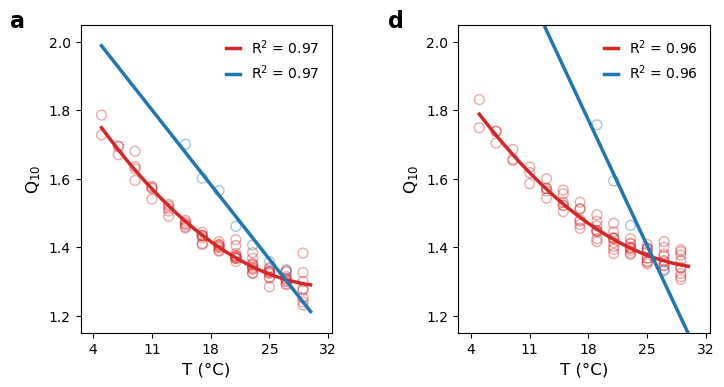

In [41]:
fig = plt.figure(figsize=(13, 9.2),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)

colors = ["#0000FF", "#4169E1", "#6495ED", "#00FF00", "#7CFC00", "#ADFF2F", "#FF0000", "#FF4500", "#FF6347", "yellow", "tab:orange", "tab:blue", "tab:gray"]



g=4

################################################################################################################################################
ax1 = fig.add_subplot(2,3,1)
#same_AVP
x = T_plot_all1
y = Q10_plot_all1
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
print(coefficients)

# 绘制原始数据和拟合曲线
for i in range(len(Q10_plot1)):
    ax1.scatter(T_plot1[i], Q10_plot1[i], marker='o', edgecolor='tab:red', facecolor='none', s=50, alpha=0.4)
x_plot1 = np.arange(5,30,0.1)
ax1.plot(x_plot1, p(x_plot1), color='tab:red', linewidth=2.5, label='R$^{2}$ = '+str(round(r_squared,2)))


#same_VPD
x = T_plot2[g]
y = Q10_plot2[g]
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
# 计算决定系数（R-squared）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
print(coefficients)


# 绘制原始数据和拟合曲线
ax1.scatter(T_plot2[g], Q10_plot2[g], marker='o', edgecolor='tab:blue', facecolor='none', s=50, alpha=0.4)
x_plot2 = np.arange(5,30,0.1)
ax1.plot(x_plot2, p(x_plot2), color='tab:blue', linewidth=2.5, label='R$^{2}$ = '+str(round(r_squared,2)))

ax1.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
ax1.set_ylim(1.15, 2.05)
ax1.set_xlim(2.5, 32.5)
ax1.set_xticks(np.linspace(4,32,5))
ax1.set_yticks(np.linspace(1.2, 2.0, 5))
ax1.set_xlabel('T (°C)',size = 12)
ax1.set_ylabel('Q$_{10}$',size = 12)
ax1.text(-0.28, 1.05, "a", transform=ax1.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')


#######################################################################################################################################################
ax2 = fig.add_subplot(2,3,2)
#same_AVP
x = T_plot_all3
y = Q10_plot_all3
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
print(coefficients)


# 绘制原始数据和拟合曲线
for i in range(len(Q10_plot3)):
    ax2.scatter(T_plot3[i], Q10_plot3[i], marker='o', edgecolor='tab:red', facecolor='none', s=50, alpha=0.4)
x_plot3 = np.arange(5,30,0.1)
ax2.plot(x_plot3, p(x_plot3), color='tab:red', linewidth=2.5, label='R$^{2}$ = '+str(round(r_squared,2)))


#same_VPD
x = T_plot4[g]
y = Q10_plot4[g]
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
print(coefficients)


# 计算决定系数（R-squared）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

# 绘制原始数据和拟合曲线

ax2.scatter(T_plot4[g], Q10_plot4[g], marker='o', edgecolor='tab:blue', facecolor='none', s=50, alpha=0.4)
x_plot4 = np.arange(5,30,0.1)
ax2.plot(x_plot4, p(x_plot4), color='tab:blue', linewidth=2.5, label='R$^{2}$ = '+str(round(r_squared,2)))

ax2.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
ax2.set_ylim(1.15, 2.05)
ax2.set_xlim(2.5, 32.5)
ax2.set_xticks(np.linspace(4,32,5))
ax2.set_yticks(np.linspace(1.2, 2.0, 5))
ax2.set_xlabel('T (°C)',size = 12)
ax2.set_ylabel('Q$_{10}$',size = 12)
ax2.text(-0.28, 1.05, "d", transform=ax2.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

In [ ]:
25

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 5.96117826e-04 -4.11319844e-02  1.98127718e+00]
[ 5.48793469e-04 -4.37501460e-02  2.08899687e+00]


Text(0.1, 0.95, 'Non forest')

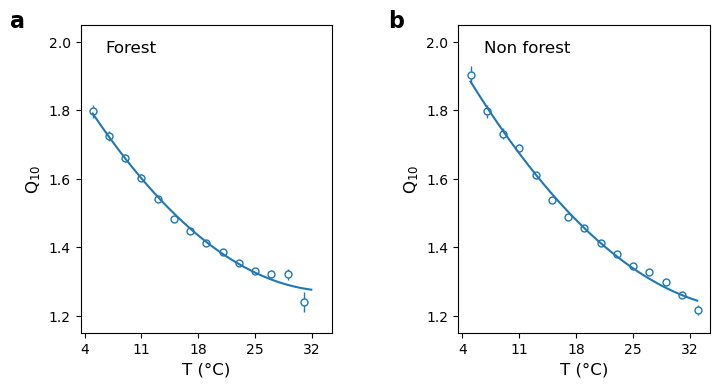

In [42]:
fig = plt.figure(figsize=(13*2.5/4, 9.2*1/2.3),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)

colors = ["#0000FF", "#4169E1", "#6495ED", "#00FF00", "#7CFC00", "#ADFF2F", "#FF0000", "#FF4500", "#FF6347", "yellow", "tab:orange", "tab:blue", "tab:gray"]

################################################################################################################################################
ax1 = fig.add_subplot(1,2,1)

x = T_plot_T_all1
y = Q10_plot_T_all1

ax1.errorbar( x,
             y,
             Q10_std1,
             fmt='o',          #marker='o',c='',edgecolors='g'
             color = 'white',
             mec = 'tab:blue',
             mew = 1,
             ecolor = 'tab:blue',
             elinewidth = 1,
             capsize = 0,
             markersize = 5,
             );


#绘制不划分AVP，和VPD的曲线

coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
# 计算决定系数（R-squared）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
x_plot12 = np.arange(5,32,0.1)
ax1.plot(x_plot12, p(x_plot12), color='tab:blue', linewidth=1.5, ls="-",zorder=4)
print(coefficients)

ax1.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
ax1.set_ylim(1.15, 2.05)
ax1.set_xlim(3.5, 34.5)
ax1.set_xticks(np.linspace(4,32,5))
ax1.set_yticks(np.linspace(1.2, 2.0, 5))
ax1.set_xlabel('T (°C)',size = 12)
ax1.set_ylabel('Q$_{10}$',size = 12)
ax1.text(-0.28, 1.05, "a", transform=ax1.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax1.text(0.1, 0.95, "Forest", transform=ax1.transAxes,
         fontsize=12, fontweight='normal', va='top', ha='left')

#######################################################################################################################################################
ax2 = fig.add_subplot(1,2,2)

x = T_plot_T_all2
y = Q10_plot_T_all2

ax2.errorbar( x,
             y,
             Q10_std2,
             fmt='o',          #marker='o',c='',edgecolors='g'
             color = 'white',
             mec = 'tab:blue',
             mew = 1,
             ecolor = 'tab:blue',
             elinewidth = 1,
             capsize = 0,
             markersize = 5,
             );

#绘制不划分AVP，和VPD的曲线

coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

x_plot22 = np.arange(5,33,0.1)
ax2.plot(x_plot22, p(x_plot22), color='tab:blue', linewidth=1.5, ls="-",zorder=4)
print(coefficients)

ax2.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
ax2.set_ylim(1.15, 2.05)
ax2.set_xlim(3.5, 34.5)
ax2.set_xticks(np.linspace(4,32,5))
ax2.set_yticks(np.linspace(1.2, 2.0, 5))
ax2.set_xlabel('T (°C)',size = 12)
ax2.set_ylabel('Q$_{10}$',size = 12)
ax2.text(-0.28, 1.05, "b", transform=ax2.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax2.text(0.1, 0.95, "Non forest", transform=ax2.transAxes,
         fontsize=12, fontweight='normal', va='top', ha='left')
#plt.savefig('C:/Users/111/Desktop/project1.1_图片/Non_fixed_Q10.pdf', format='pdf')


In [9]:
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_forest_VPD_days10.csv')
m,n = Q10_data.shape

Q10_std_plot1 = []
T_std_plot1 = []

for Ti in np.arange(5,35,2):
    Q10_i = []

    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 30:
            Q10_i.append(Q10_data['Q10'][j])

    if len(Q10_i)>=3:
        Q10_std_plot1.append(np.std(Q10_i))
        T_std_plot1.append(Ti)

##############################################################################################################
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_non_forest_VPD_days10.csv')
m,n = Q10_data.shape

Q10_std_plot2 = []
T_std_plot2 = []

for Ti in np.arange(5,35,2):
    Q10_i = []

    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 30:
            Q10_i.append(Q10_data['Q10'][j])

    if len(Q10_i)>=3:
        Q10_std_plot2.append(np.std(Q10_i))
        T_std_plot2.append(Ti)

In [10]:
np.mean(Q10_std_plot1)

0.050346528038276876

In [11]:
np.mean(Q10_std_plot2)

0.049145639350576566

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 



In [10]:
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_forest_VPD_days10.csv') #non_
m,n = Q10_data.shape

Q10_AVP_plot1 = []
T_AVP_plot1 = []
AVP_AVP_plot1 =[]

for Ti in np.arange(5,35,1):
    Q10_ploti = []
    AVP_ploti = []
    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] ==0 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 30:
            Q10_ploti.append(Q10_data['Q10'][j])
            AVP_ploti.append(Q10_data['AVP'][j])
    if len(Q10_ploti)>=3:
        Q10_AVP_plot1.append(Q10_ploti)
        AVP_AVP_plot1.append(AVP_ploti)
        T_AVP_plot1.append(Ti)

##########################################################################################################################################
Q10_data = pd.read_csv('./Old_result/A_Result_2/Q10_non_forest_VPD_days10.csv') #non_
m,n = Q10_data.shape

Q10_AVP_plot2 = []
T_AVP_plot2 = []
AVP_AVP_plot2 =[]

for Ti in np.arange(5,35,1):
    Q10_ploti = []
    AVP_ploti = []
    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] ==0 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 30:
            Q10_ploti.append(Q10_data['Q10'][j])
            AVP_ploti.append(Q10_data['AVP'][j])
    if len(Q10_ploti)>=3:
        Q10_AVP_plot2.append(Q10_ploti)
        AVP_AVP_plot2.append(AVP_ploti)
        T_AVP_plot2.append(Ti)

In [11]:
#Q10与AVP之间的斜率

slope1 = []
pvalue1 = []
pvalue_symbol1 = []
T_slope1 = []
for i in range(len(AVP_AVP_plot1)):
    AVP_AVP_plot1i = sm.add_constant(AVP_AVP_plot1[i])
    model = sm.OLS(Q10_AVP_plot1[i], AVP_AVP_plot1i)
    results = model.fit()
    slope1.append(results.params[1])
    pvalue1.append(results.pvalues[1])
    T_slope1.append(T_AVP_plot1[i])
    if results.pvalues[1]<0.05:
        pvalue_symbol1.append('*')
    elif results.pvalues[1]<0.01:
        pvalue_symbol1.append('**')
    elif results.pvalues[1]<0.05:
        pvalue_symbol1.append('***')
    else:
        pvalue_symbol1.append(' ')
    #print(results.params[1], results.pvalues[1])
    
    
slope2 = []
pvalue2 = []
pvalue_symbol2 = []
T_slope2 = []
for i in range(len(AVP_AVP_plot2)):
    AVP_AVP_plot2i = sm.add_constant(AVP_AVP_plot2[i])
    model = sm.OLS(Q10_AVP_plot2[i], AVP_AVP_plot2i)
    results = model.fit()
    slope2.append(results.params[1])
    pvalue2.append(results.pvalues[1])
    T_slope2.append(T_AVP_plot2[i])
    if results.pvalues[1]<0.05:
        pvalue_symbol2.append('*')
    elif results.pvalues[1]<0.01:
        pvalue_symbol2.append('**')
    elif results.pvalues[1]<0.05:
        pvalue_symbol2.append('***')
    else:
        pvalue_symbol2.append(' ')
    #print(results.params[1], results.pvalues[1])

Text(-0.28, 1.05, 'd')

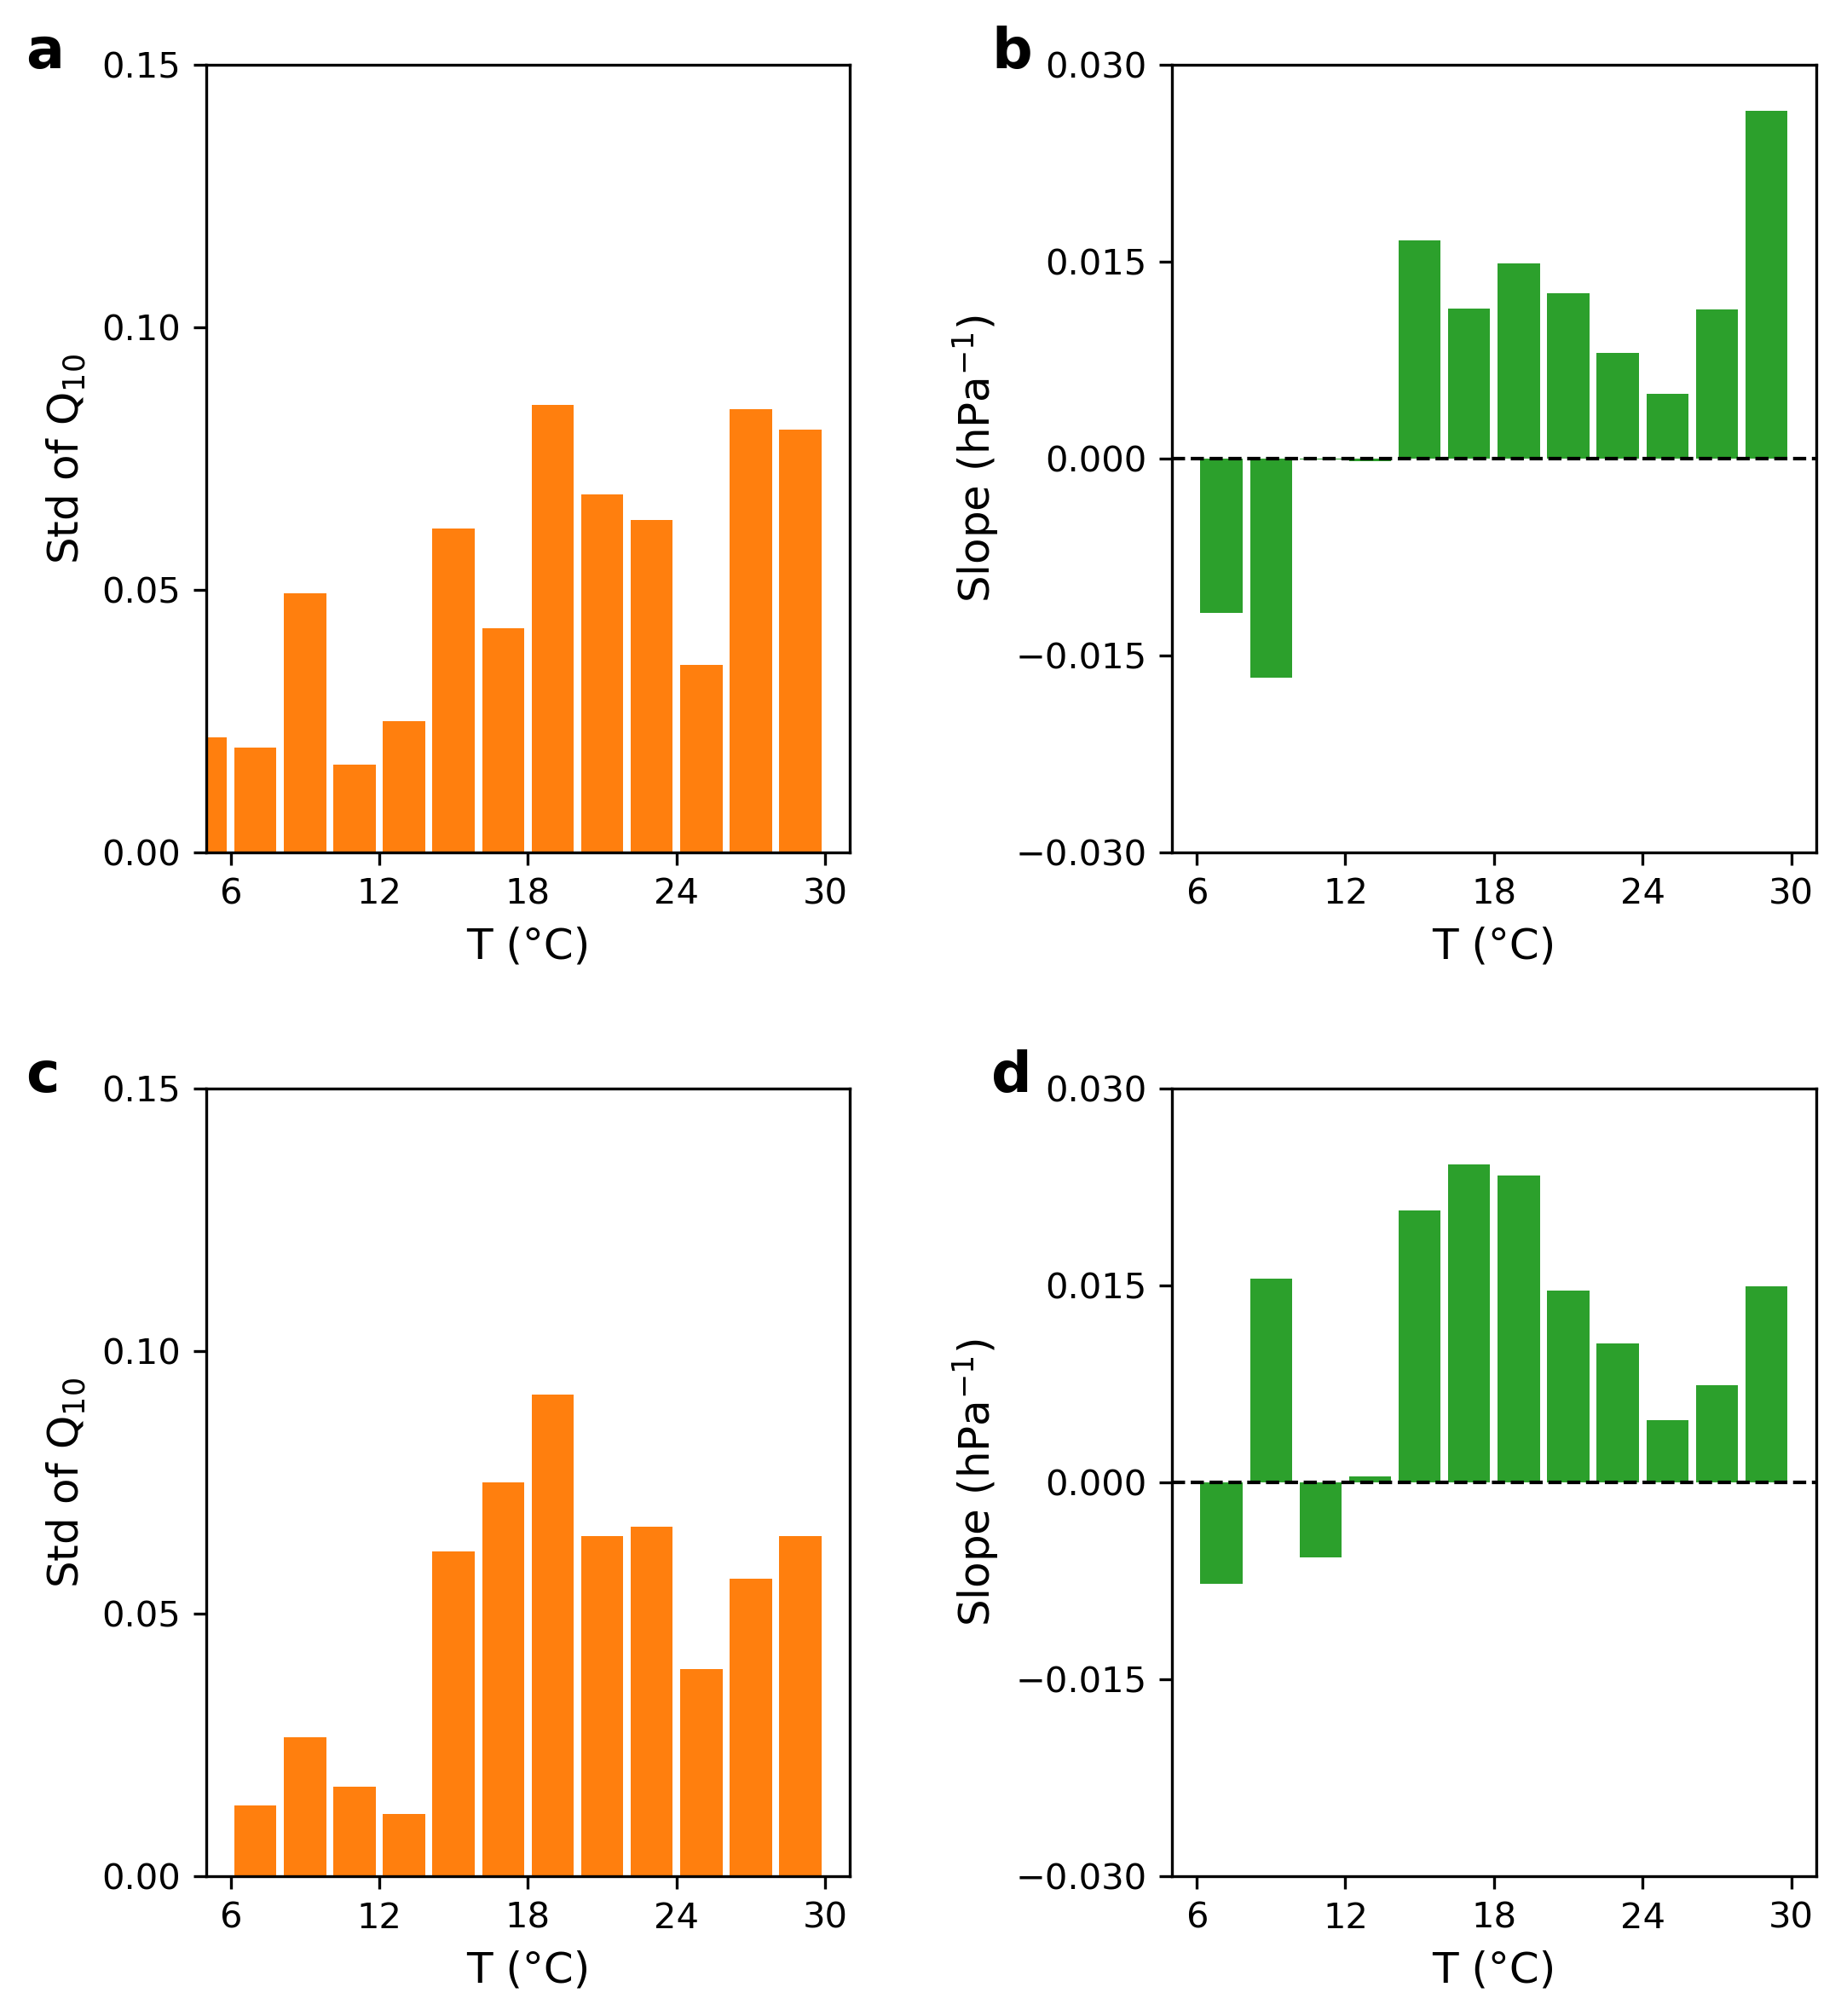

In [12]:
fig = plt.figure(figsize=(13*2.5/4, 9.2),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)

colors = ["#0000FF", "#4169E1", "#6495ED", "#00FF00", "#7CFC00", "#ADFF2F", "#FF0000", "#FF4500", "#FF6347", "yellow", "tab:orange", "tab:blue", "tab:gray"]

ax3 = fig.add_subplot(2,2,1)
ax3.bar(T_std_plot1, Q10_std_plot1, width=1.7, color='tab:orange')
ax3.set_ylim(0,0.06)
ax3.set_xlim(5, 31)
ax3.set_xticks(np.linspace(6,30,5))
ax3.set_yticks(np.linspace(0, 0.15, 4))
ax3.set_xlabel('T (°C)',size = 12)
ax3.set_ylabel('Std of Q$_{10}$',size = 12)
ax3.text(-0.28, 1.05, "a", transform=ax3.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

ax4 = fig.add_subplot(2,2,3)
ax4.bar(T_std_plot2, Q10_std_plot2, width=1.7, color='tab:orange')
ax4.set_ylim(0,0.06)
ax4.set_xlim(5, 31)
ax4.set_xticks(np.linspace(6,30,5))
ax4.set_yticks(np.linspace(0, 0.15, 4))
ax4.set_xlabel('T (°C)',size = 12)
ax4.set_ylabel('Std of Q$_{10}$',size = 12)
ax4.text(-0.28, 1.05, "c", transform=ax4.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

################################################################################################################################################################
ax5 = fig.add_subplot(2,2,2)
ax5.bar(T_slope1, slope1, width=1.7, color='tab:green')
ax5.axhline(y=0,ls="--",linewidth=1,c="black", zorder=2)
ax5.set_ylim(-0.01,0.02)
ax5.set_xlim(5, 31)
ax5.set_xticks(np.linspace(6,30,5))
ax5.set_yticks(np.linspace(-0.03,0.03, 5))
ax5.set_xlabel('T (°C)',size = 12)
ax5.set_ylabel('Slope (hPa$^{-1}$)',size = 12)
ax5.text(-0.28, 1.05, "b", transform=ax5.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

ax6 = fig.add_subplot(2,2,4)
ax6.bar(T_slope2, slope2, width=1.7, color='tab:green')
ax6.axhline(y=0,ls="--",linewidth=1,c="black", zorder=2)
ax6.set_ylim(-0.01,0.02)
ax6.set_xlim(5, 31)
ax6.set_xticks(np.linspace(6,30,5))
ax6.set_yticks(np.linspace(-0.03,0.03, 5))
ax6.set_xlabel('T (°C)',size = 12)
ax6.set_ylabel('Slope (hPa$^{-1}$)',size = 12)
ax6.text(-0.28, 1.05, "d", transform=ax6.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')